# Basic Vega-Lite Example

In [6]:
import pandas as pd
df = pd.read_json('cars.json')

In [8]:
df.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970


In [9]:
from vega3 import VegaLite

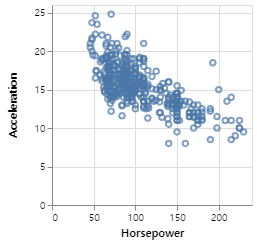

In [10]:
VegaLite({
  "mark": "point",
  "encoding": {
    "y": {"type": "quantitative","field": "Acceleration"},
    "x": {"type": "quantitative","field": "Horsepower"}
  }
}, df)

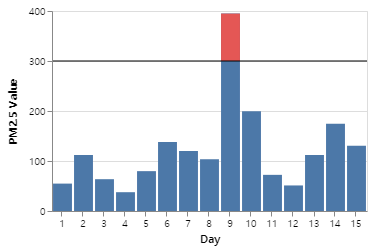

In [15]:
VegaLite({
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "The PM2.5 value of Beijing observed 15 days, highlighting the days when PM2.5 level is hazardous to human health. Data source https://chartaccent.github.io/chartaccent.html",
    "layer": [{
      "data": {
        "values": [
          {"Day": 1, "Value": 54.8},
          {"Day": 2, "Value": 112.1},
          {"Day": 3, "Value": 63.6},
          {"Day": 4, "Value": 37.6},
          {"Day": 5, "Value": 79.7},
          {"Day": 6, "Value": 137.9},
          {"Day": 7, "Value": 120.1},
          {"Day": 8, "Value": 103.3},
          {"Day": 9, "Value": 394.8},
          {"Day": 10, "Value": 199.5},
          {"Day": 11, "Value": 72.3},
          {"Day": 12, "Value": 51.1},
          {"Day": 13, "Value": 112.0},
          {"Day": 14, "Value": 174.5},
          {"Day": 15, "Value": 130.5}
        ]
      },
      "layer": [{
        "mark": "bar",
        "encoding": {
          "x": {"field": "Day", "type": "ordinal", "axis": {"labelAngle": 0}},
          "y": {"field": "Value", "type": "quantitative"}
        }
      }, {
        "mark": "bar",
        "transform": [
          {"filter": "datum.Value >= 300"},
          {"calculate": "300", "as": "baseline"}
        ],
        "encoding": {
          "x": {"field": "Day", "type": "ordinal"},
          "y": {"field": "baseline", "type": "quantitative"},
          "y2": {"field": "Value", "type": "quantitative"},
          "color": {"value": "#e45755"}
        }
      }
    ]}, {
      "data": {
         "values": [
          {"ThresholdValue": 300, "Threshold": "hazardous"}
        ]
      },
      "layer": [{
        "mark": "rule",
        "encoding": {
          "y": {"field": "ThresholdValue", "type": "quantitative"}
        }
      }, {
        "mark": {
          "type": "text",
          "align": "right",
          "dx": -2,
          "dy": -4
        },
        "encoding": {
          "x": {
            "value": "width"
          },
          "y": {
            "field": "ThresholdValue",
            "type": "quantitative",
            "axis": {"title": "PM2.5 Value"}
          },
          "text": {"field": "Threshold", "type": "ordinal"}
        }
      }]
    }
  ]
})